In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing DataSet
df = pd.read_csv('/content/chocolate_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Reference                       2789 non-null   float64
 1   Manufacturing Company           2789 non-null   object 
 2   Company Location                2789 non-null   object 
 3   Review Date                     2789 non-null   float64
 4   Country of Bean Origin          2789 non-null   object 
 5   Speciﬁc Bean Origin             2789 non-null   object 
 6   Cocoa Percent                   2789 non-null   object 
 7   Ingredients                     2702 non-null   object 
 8   Most Memorable Characteristics  2789 non-null   object 
 9   Rating                          2789 non-null   float64
dtypes: float64(3), object(7)
memory usage: 218.0+ KB


In [5]:
df.head()

,Reference,Manufacturing Company,Company Location,Review Date,Country of Bean Origin,Speciﬁc Bean Origin,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454.0,5150,U.S.A.,2019.0,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458.0,5150,U.S.A.,2019.0,Dominican\nRepublic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454.0,5150,U.S.A.,2019.0,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,2542.0,5150,U.S.A.,2021.0,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie,\nmacadamia,chewy",3.50
4,2546.0,5150,U.S.A.,2021.0,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25


In [6]:
df.shape

(2789, 10)

# **Data Preprocessing**

In [7]:
#Checking for null values
print(df.isnull().sum())

Reference                          0
Manufacturing Company              0
Company Location                   0
Review Date                        0
Country of Bean Origin             0
Speciﬁc Bean Origin                0
Cocoa Percent                      0
Ingredients                       87
Most Memorable Characteristics     0
Rating                             0
dtype: int64


In [8]:
# Handling missing Values using Mode
df_cleaned = df.copy()
most_common_ingredient = df['Ingredients'].mode()[0]

# Fill missing values with that value
df_cleaned['Ingredients'] = df['Ingredients'].fillna(most_common_ingredient)

In [9]:
print(df_cleaned.isnull().sum())

Reference                         0
Manufacturing Company             0
Company Location                  0
Review Date                       0
Country of Bean Origin            0
Speciﬁc Bean Origin               0
Cocoa Percent                     0
Ingredients                       0
Most Memorable Characteristics    0
Rating                            0
dtype: int64


In [10]:
# Removing Unnecessary Columns
df_cleaned = df_cleaned.drop('Reference', axis=1)

# Converting Float to Integer
df_cleaned['Review Date'] = df['Review Date'].fillna(0).astype(int)

#Remove the '%' symbol and convert to float
df_cleaned["Cocoa Percent"] = df['Cocoa Percent'].str.strip('%').astype(float)


In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Manufacturing Company           2789 non-null   object 
 1   Company Location                2789 non-null   object 
 2   Review Date                     2789 non-null   int64  
 3   Country of Bean Origin          2789 non-null   object 
 4   Speciﬁc Bean Origin             2789 non-null   object 
 5   Cocoa Percent                   2789 non-null   float64
 6   Ingredients                     2789 non-null   object 
 7   Most Memorable Characteristics  2789 non-null   object 
 8   Rating                          2789 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 196.2+ KB


# **Data Analysis and Visualization**

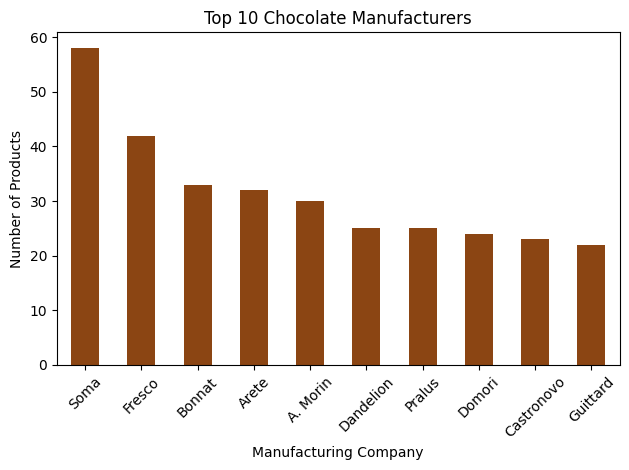

In [12]:
#Top 10 Most Frequent Manufacturers
df_cleaned['Manufacturing Company'].value_counts().head(10).plot(kind='bar', color='saddlebrown')
plt.title('Top 10 Chocolate Manufacturers')
plt.xlabel('Manufacturing Company')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

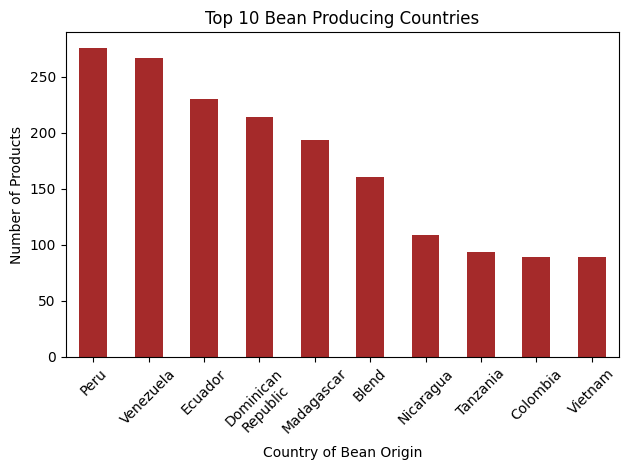

In [13]:
#Top 10 Chocolate Bean Producing Countries
df_cleaned['Country of Bean Origin'].value_counts().head(10).plot(kind='bar', color='brown')
plt.title('Top 10 Bean Producing Countries')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-14-863d46ec5d52>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='Speciﬁc Bean Origin', y='Rating', palette='YlOrBr')


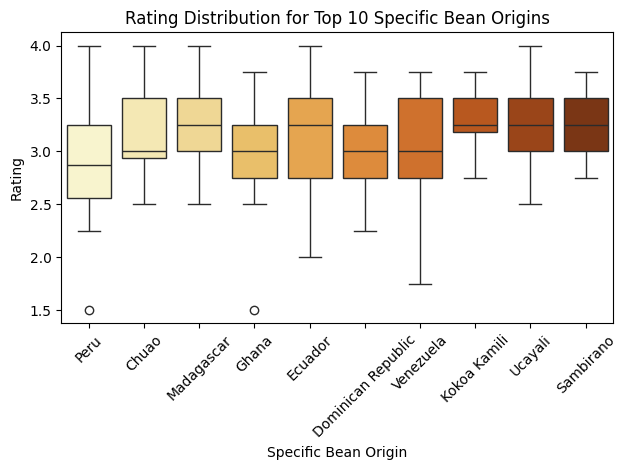

In [14]:
#Average Rating by Specific Bean Origin (Top 10)
top_bean_origins = df_cleaned['Speciﬁc Bean Origin'].value_counts().head(10).index
subset = df_cleaned[df_cleaned['Speciﬁc Bean Origin'].isin(top_bean_origins)]
sns.boxplot(data=subset, x='Speciﬁc Bean Origin', y='Rating', palette='YlOrBr')
plt.title('Rating Distribution for Top 10 Specific Bean Origins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-15-64b195d0030a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_ing, x='Ingredients', y='Rating', palette='Set3')


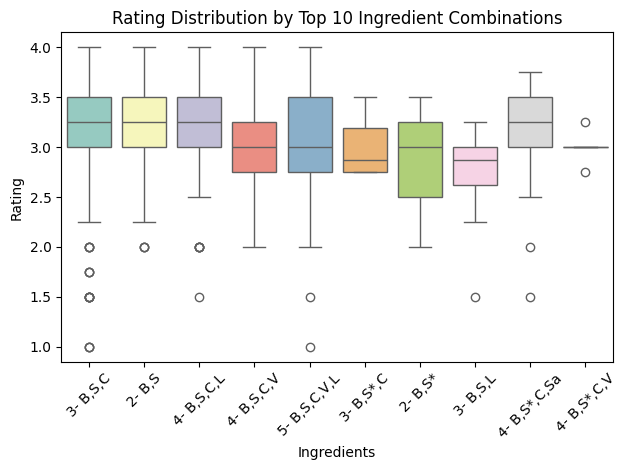

In [15]:
#Rating Distribution by Top 10 Ingredients
top_ingredients = df_cleaned['Ingredients'].value_counts().head(10).index
subset_ing = df_cleaned[df_cleaned['Ingredients'].isin(top_ingredients)]
sns.boxplot(data=subset_ing, x='Ingredients', y='Rating', palette='Set3')
plt.title('Rating Distribution by Top 10 Ingredient Combinations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-16-cba34d439361>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette='magma')


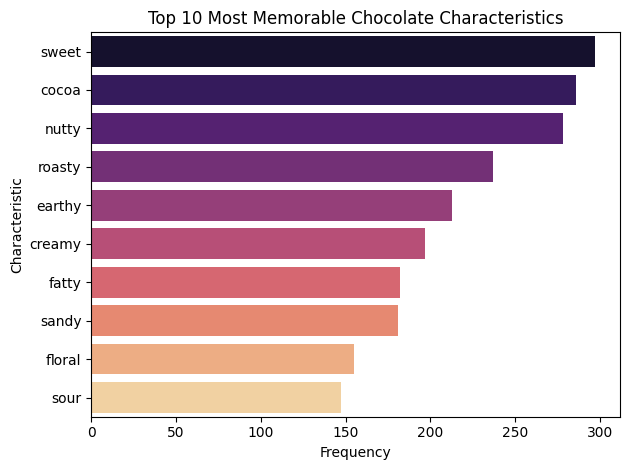

In [16]:
#Most Memorable Characteristics – Word Frequency
from collections import Counter

# Split words and count frequencies
words = df_cleaned['Most Memorable Characteristics'].str.cat(sep=',').lower().split(',')
word_counts = Counter([w.strip() for w in words])
top_words = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# Plot
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette='magma')
plt.title('Top 10 Most Memorable Chocolate Characteristics')
plt.xlabel('Frequency')
plt.ylabel('Characteristic')
plt.tight_layout()
plt.show()

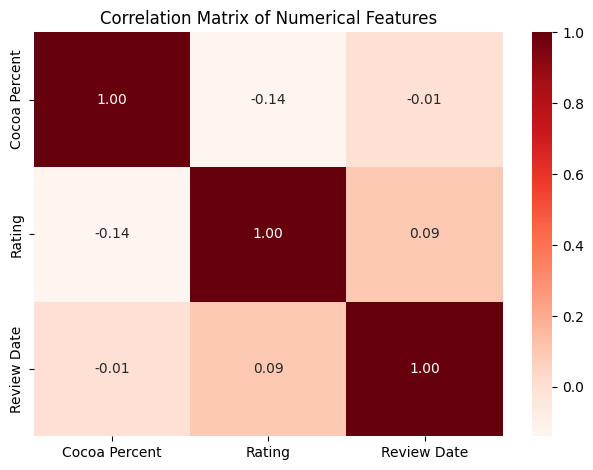

In [17]:
#Heatmap of Correlations (Cocoa %, Rating, Review Year)
correlation_data = df_cleaned[['Cocoa Percent', 'Rating', 'Review Date']]
sns.heatmap(correlation_data.corr(), annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

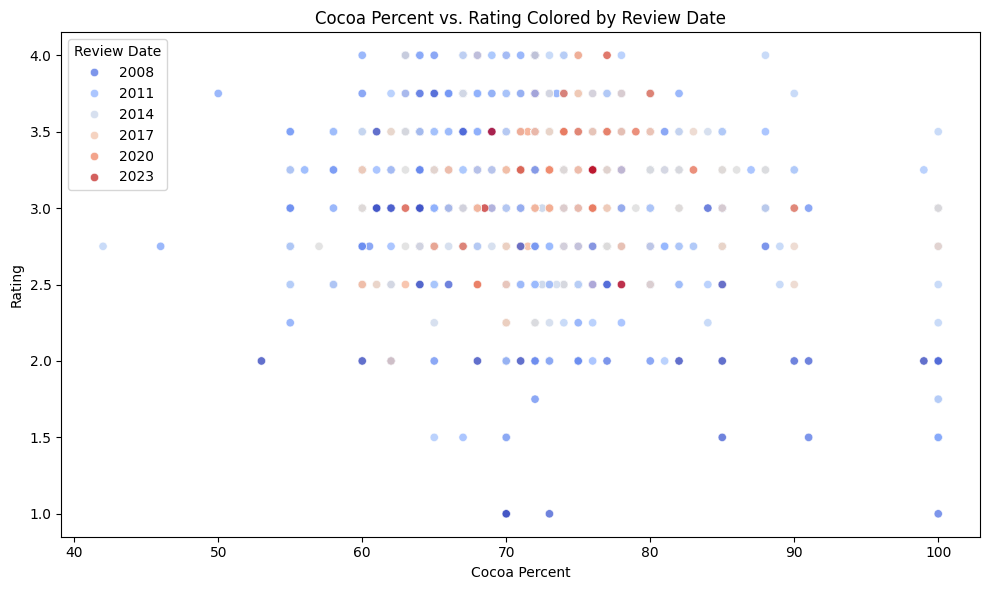

In [18]:
#Cocoa Percent vs. Rating Colored by Review Date
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x='Cocoa Percent',
    y='Rating',
    hue='Review Date',
    palette='coolwarm',
    alpha=0.8
)
plt.title('Cocoa Percent vs. Rating Colored by Review Date')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

In [19]:
# < 70%
cocoa_U70 = df_cleaned[df_cleaned['Cocoa Percent'] <= 70].sort_values(by='Cocoa Percent')
print("Cocoa % < 70:", cocoa_U70['Cocoa Percent'].unique())

# 71–80%
cocoa_U80 = df_cleaned[(df_cleaned['Cocoa Percent'] > 70) & (df_cleaned['Cocoa Percent'] <= 80)].sort_values(by='Cocoa Percent')
print("Cocoa % 71–80:", cocoa_U80['Cocoa Percent'].unique())

# 81–90%
cocoa_U90 = df_cleaned[(df_cleaned['Cocoa Percent'] > 80) & (df_cleaned['Cocoa Percent'] <= 90)].sort_values(by='Cocoa Percent')
print("Cocoa % 81–90:", cocoa_U90['Cocoa Percent'].unique())

# 91–100%
cocoa_U100 = df_cleaned[(df_cleaned['Cocoa Percent'] > 90) & (df_cleaned['Cocoa Percent'] <= 100)].sort_values(by='Cocoa Percent')
print("Cocoa % 91–100:", cocoa_U100['Cocoa Percent'].unique())

Cocoa % < 70: [42.  46.  50.  53.  55.  56.  57.  58.  60.  60.5 61.  62.  63.  64.
 65.  66.  67.  68.  68.5 69.  70. ]
Cocoa % 71–80: [71.  71.5 72.  72.5 73.  73.5 74.  75.  76.  77.  78.  79.  80. ]
Cocoa % 81–90: [81. 82. 83. 84. 85. 86. 87. 88. 89. 90.]
Cocoa % 91–100: [ 91.  99. 100.]


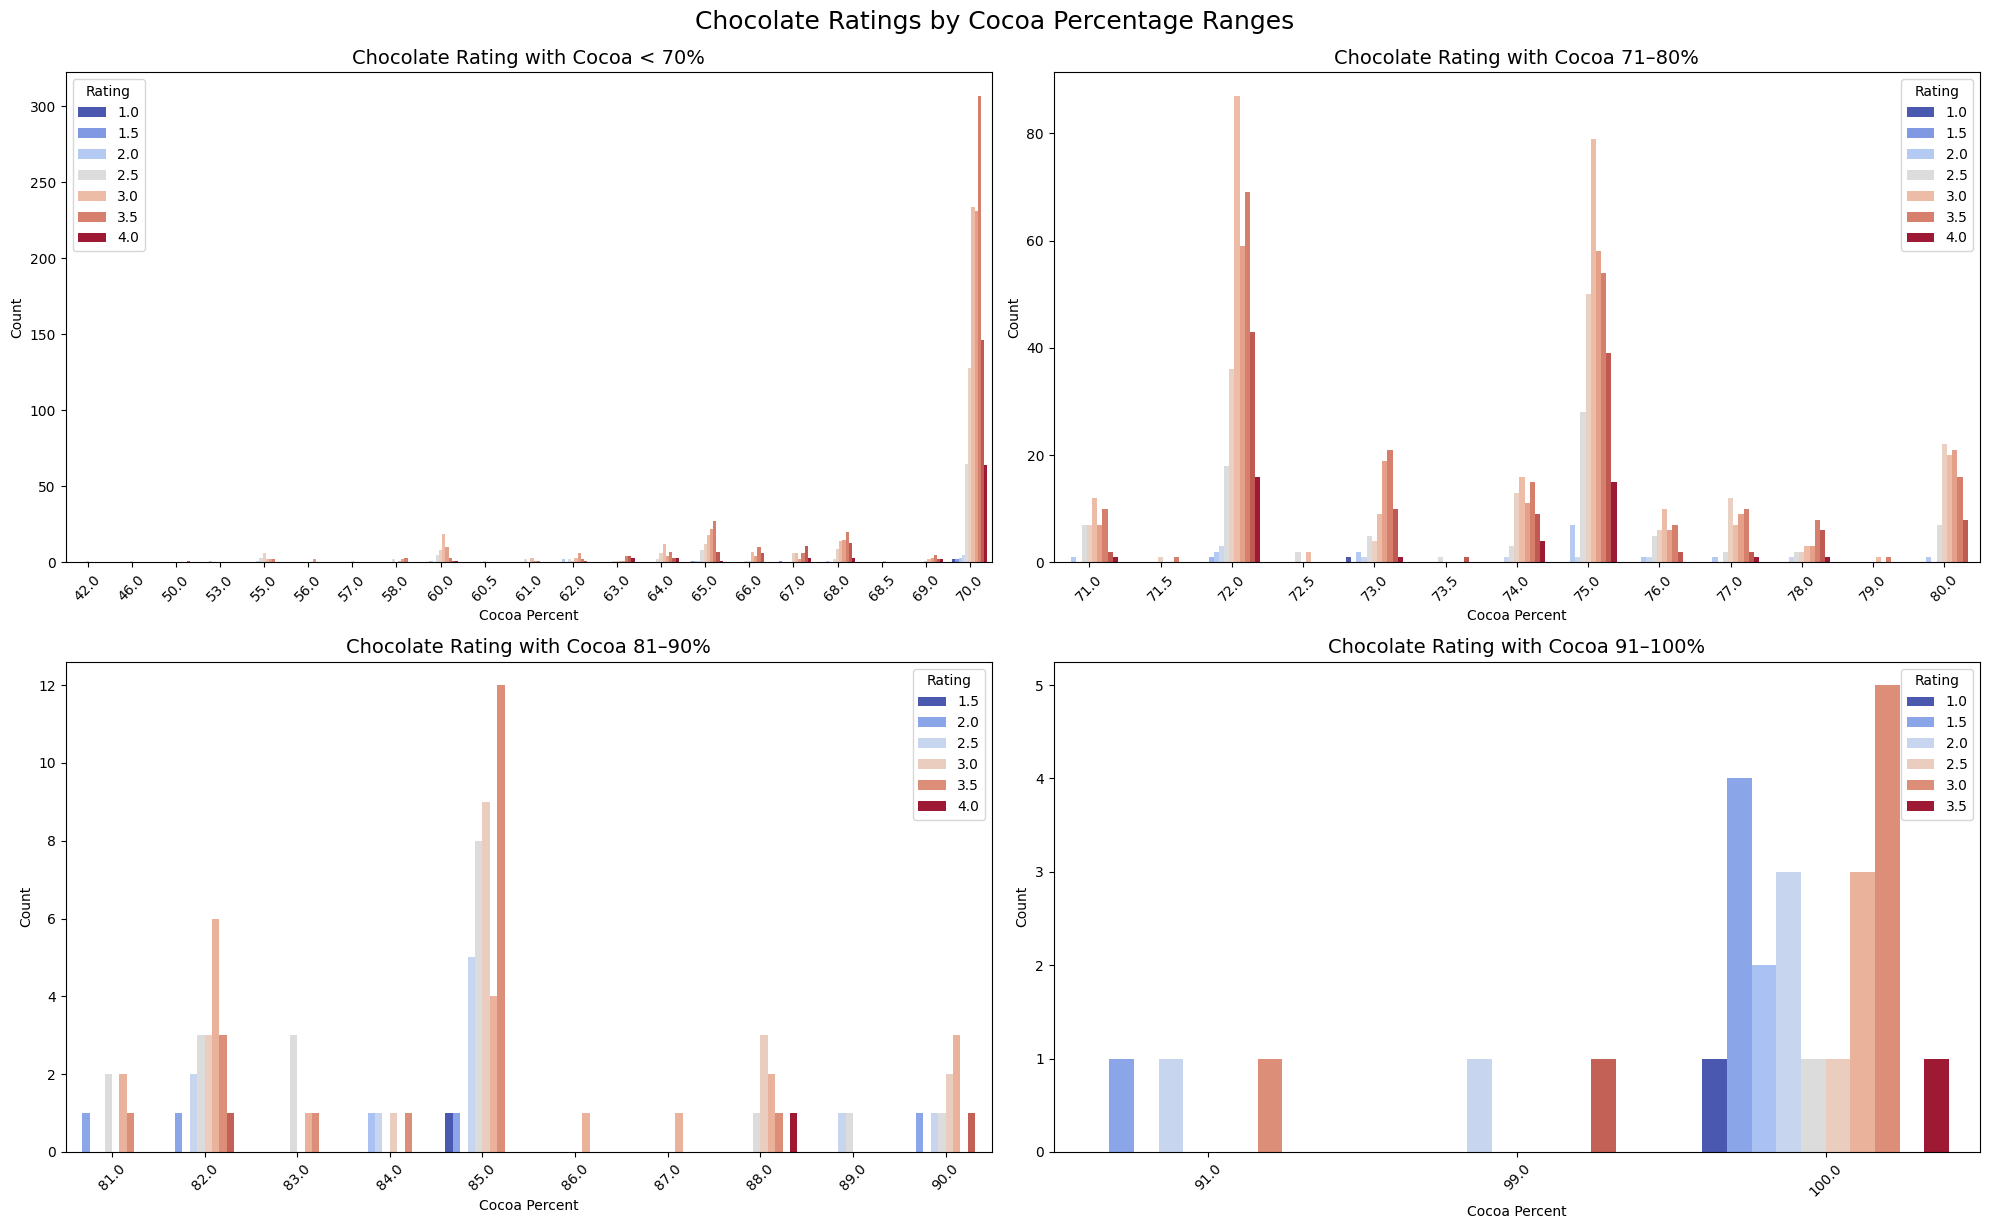

In [20]:
cocoa_data = [
    (cocoa_U70, 'Chocolate Rating with Cocoa < 70%'),
    (cocoa_U80, 'Chocolate Rating with Cocoa 71–80%'),
    (cocoa_U90, 'Chocolate Rating with Cocoa 81–90%'),
    (cocoa_U100,'Chocolate Rating with Cocoa 91–100%')
]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes = axes.flatten()  # Flatten the 2D array to loop easily

# Plot each cocoa bin in its subplot
for i, (df_subset, title) in enumerate(cocoa_data):
    sns.countplot(data=df_subset, x='Cocoa Percent', hue='Rating', palette='coolwarm', ax=axes[i])
    axes[i].set_title(title, fontsize=14)
    axes[i].set_xlabel('Cocoa Percent')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Rating')

# Hide the last (6th) unused subplot
if len(cocoa_data) < len(axes):
    for j in range(len(cocoa_data), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Chocolate Ratings by Cocoa Percentage Ranges', fontsize=18, y=1.02)
plt.show()


In [21]:
#ratings averages - by review year, overall

avg_year = df_cleaned.groupby('Review Date').Rating.mean()
print(avg_year)

overall_avg = df_cleaned.Rating.mean()
print(overall_avg)

# split dataframe on ratings boundaries for clearer visualisations
min_ratings=df_cleaned[(df_cleaned.Rating) <= 1.5]
print(min_ratings)

mid_ratings=df_cleaned[(df_cleaned.Rating <= 2.0) & (df_cleaned.Rating >= 1.5)]
print(mid_ratings)

max_ratings=df_cleaned[(df_cleaned.Rating) >= 4.0]
print(max_ratings)

Review Date
2006    3.004032
2007    3.104167
2008    3.000000
2009    3.073171
2010    3.152273
2011    3.257669
2012    3.180412
2013    3.196721
2014    3.189271
2015    3.243816
2016    3.228111
2017    3.361905
2018    3.191886
2019    3.136719
2020    3.256173
2021    3.318966
2022    3.260204
2023    3.165493
2024    3.172872
Name: Rating, dtype: float64
3.197024022947293
          Manufacturing Company      Company Location  Review Date  \
330                      Bonnat                France         2006   
358     Bouga Cacao\n(Tulicorp)               Ecuador         2009   
466    Cacaoyere\n(Ecuatoriana)               Ecuador         2008   
467                   Callebaut               Belgium         2007   
647             Claudio Corallo  Sao Tome\n& Principe         2008   
693                   Coppeneur               Germany         2012   
696         Cote d' Or\n(Kraft)               Belgium         2006   
841           Dolﬁn (Belcolade)               Belgium     

In [22]:
#split dataframe into a seperate dataframe for each year to visualise ratings per year

fourteen=df_cleaned[df_cleaned['Review Date'] == 2014]
#print(fourteen.head())
fifteen=df_cleaned[df_cleaned['Review Date'] == 2015]
#print(fifteen.head())
sixteen=df_cleaned[df_cleaned['Review Date'] == 2016]
#print(sixteen.head())
seventeen=df_cleaned[df_cleaned['Review Date'] == 2017]
#print(seventeen.head())
eighteen=df_cleaned[df_cleaned['Review Date'] == 2018]
#print(eighteen.head())
nineteen=df_cleaned[df_cleaned['Review Date'] == 2019]
#print(nineteen.head())
twenty=df_cleaned[df_cleaned['Review Date'] == 2020]
#print(twenty.head())
twentyone=df_cleaned[df_cleaned['Review Date'] == 2021]
#print(twentyone.head())
twentytwo=df_cleaned[df_cleaned['Review Date'] == 2022]
#print(twentytwo.head())
twentythree=df_cleaned[df_cleaned['Review Date']== 2023]
#print(twentyone.head())
twentyfour=df_cleaned[df_cleaned['Review Date']== 2024]
print(twentyfour.head())

   Manufacturing Company Company Location  Review Date Country of Bean Origin  \
7                  20/20        Venezuela         2024              Venezuela   
11              A. Craft           U.S.A.         2024               Tanzania   
12              A. Craft           U.S.A.         2024                  India   
13              A. Craft           U.S.A.         2024                   Peru   
14              A. Craft           U.S.A.         2024    Dominican\nRepublic   

                    Speciﬁc Bean Origin  Cocoa Percent Ingredients  \
7   Chuao, Hacienda Luna Clara,\nAragua           70.0      2- B,S   
11                Kokoa Kamili, batch 4           65.0    3- B,S,C   
12                    Anamalai, batch 1           70.0    3- B,S,C   
13                     Ucayali, batch 4           65.0    3- B,S,C   
14                      Zorzal, batch 1           70.0    3- B,S,C   

   Most Memorable Characteristics  Rating  
7     choco, fruity, chemical off    2.50  
11  

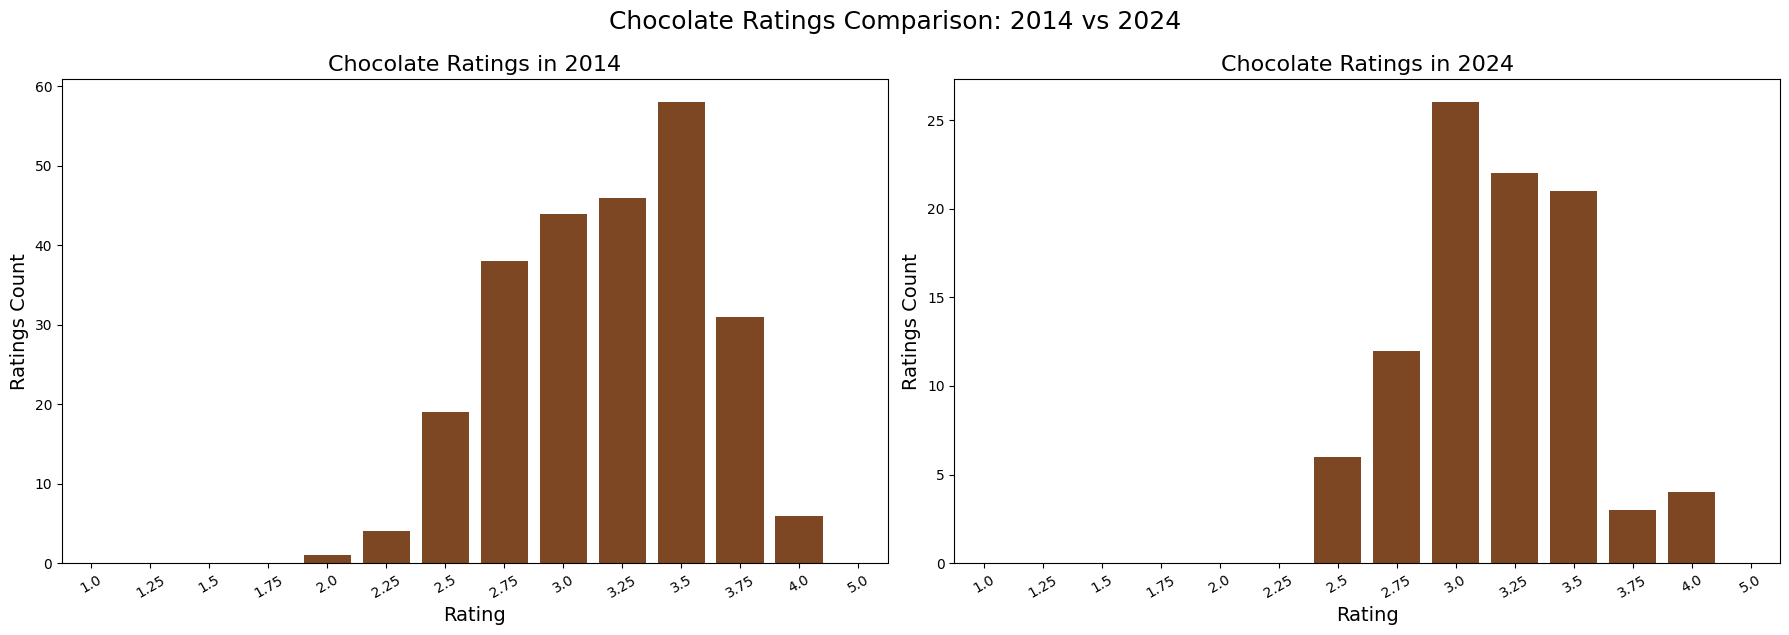

In [23]:
#plot ratings for each year on a bargraph.

# Create a 1x2 subplot figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Common label order for both
label_order = [1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 5.0]

# First subplot: 2014
sns.countplot(data=fourteen, x='Rating', order=label_order, color='saddlebrown', ax=axes[0])
axes[0].set_title('Chocolate Ratings in 2014', size=16)
axes[0].set_xlabel('Rating', size=14)
axes[0].set_ylabel('Ratings Count', size=14)
axes[0].tick_params(axis='x', rotation=30)

# Second subplot: 2024
sns.countplot(data=twentyfour, x='Rating', order=label_order, color='saddlebrown', ax=axes[1])
axes[1].set_title('Chocolate Ratings in 2024', size=16)
axes[1].set_xlabel('Rating', size=14)
axes[1].set_ylabel('Ratings Count', size=14)
axes[1].tick_params(axis='x', rotation=30)

# Adjust layout
plt.tight_layout()
plt.suptitle('Chocolate Ratings Comparison: 2014 vs 2024', size=18, y=1.05)
plt.show()


#**Random Forest Classifier**

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

# Define chocolate quality categories
def categorize_rating(r):
    if r >= 4.0:
        return 'Premium'
    elif r >= 3.0:
        return 'Average'
    else:
        return 'Low Quality'

# Apply to new column
df_cleaned.loc[:,'Quality Category'] = df_cleaned['Rating'].apply(categorize_rating)

# Select relevant features
features = df_cleaned[['Cocoa Percent', 'Ingredients', 'Company Location', 'Country of Bean Origin']]
target = df_cleaned['Quality Category']

# Encode categorical features
df_encoded = features.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[341  45  18]
 [105  23   3]
 [ 20   1   2]]
Accuracy:
0.6559139784946236

Classification Report:
              precision    recall  f1-score   support

     Average       0.73      0.84      0.78       404
 Low Quality       0.33      0.18      0.23       131
     Premium       0.09      0.09      0.09        23

    accuracy                           0.66       558
   macro avg       0.38      0.37      0.37       558
weighted avg       0.61      0.66      0.63       558



<ipython-input-25-6c7e925a2bb7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf.feature_importances_, y=df_encoded.columns, palette='Set2')


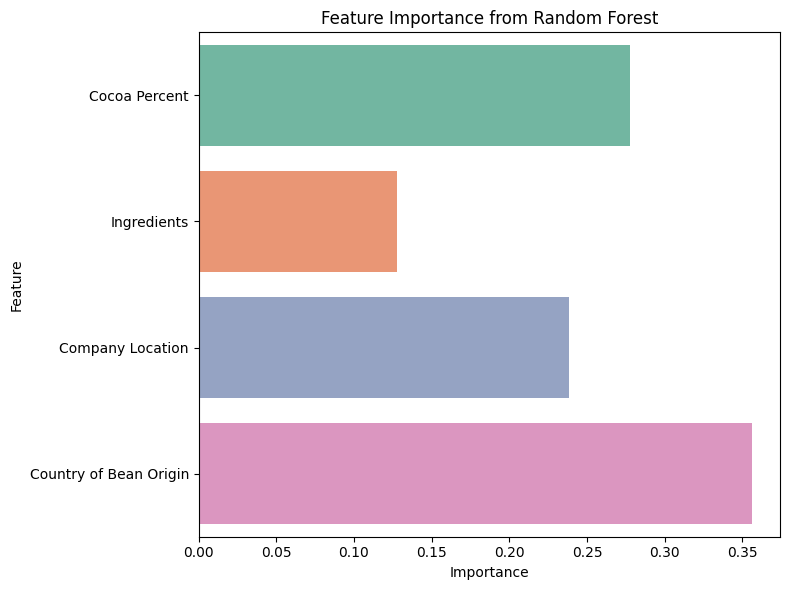

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x=rf.feature_importances_, y=df_encoded.columns, palette='Set2')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

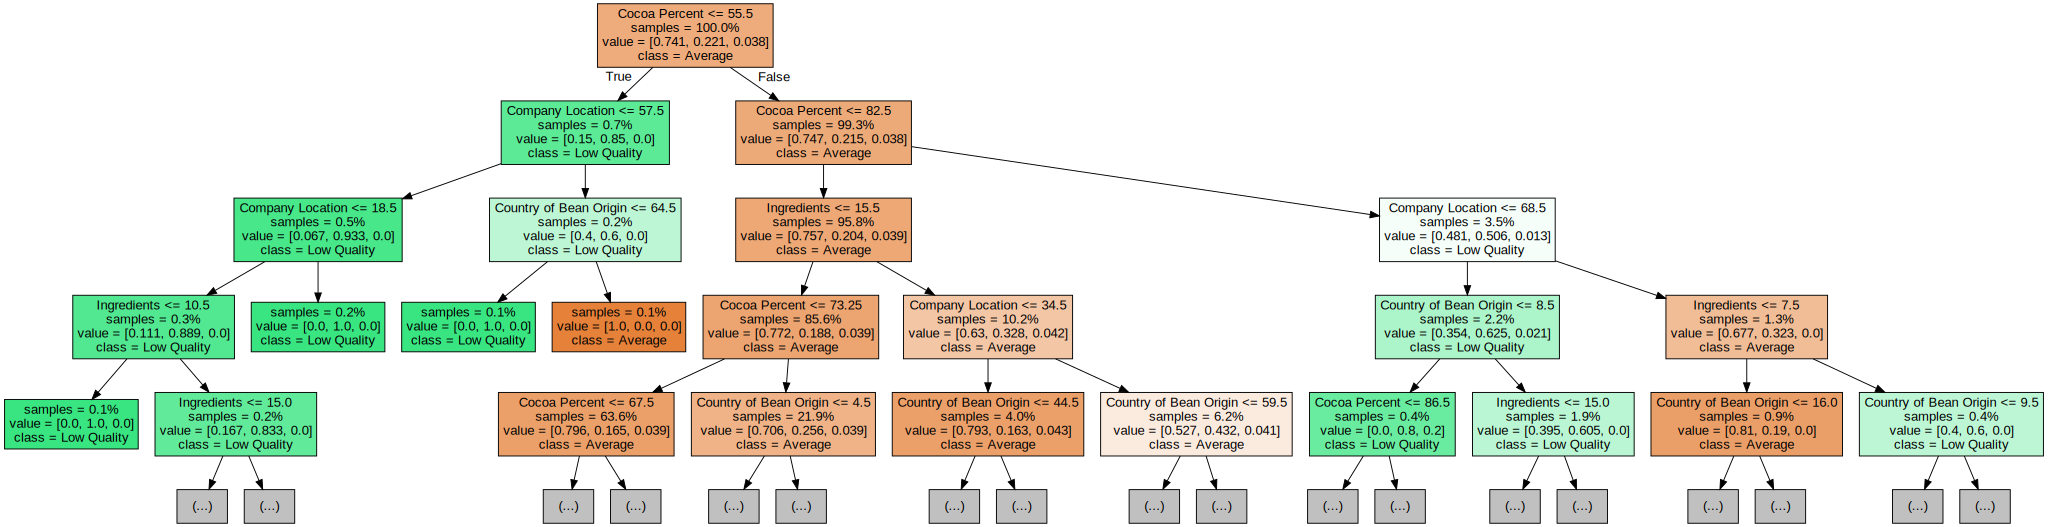

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Visualize the first decision tree from the forest
tree = rf.estimators_[0]
dot_data = export_graphviz(tree,
                           feature_names=df_encoded.columns,
                           class_names=rf.classes_,
                           filled=True,
                           max_depth=4,
                           impurity=False,
                           proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

# **Support Vector Machine**

In [27]:
from sklearn.svm import SVC

# Define chocolate quality categories
def categorize_rating(r):
    if r >= 4.0:
        return 'Premium'
    elif r >= 3.0:
        return 'Average'
    else:
        return 'Low Quality'

# Apply to new column
df_cleaned.loc[:,'Quality Category'] = df_cleaned['Rating'].apply(categorize_rating)

# Select relevant features
features = df_cleaned[['Cocoa Percent', 'Ingredients', 'Company Location', 'Country of Bean Origin']]
target = df_cleaned['Quality Category']

# Encode categorical features
df_encoded = features.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.2, random_state=42)
# Instantiate, train, and predict with an SVM
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy:")
print(f"{accuracy_score(y_test, y_pred):}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[404   0   0]
 [131   0   0]
 [ 23   0   0]]

Accuracy:
0.7240143369175627

Classification Report:
              precision    recall  f1-score   support

     Average       0.72      1.00      0.84       404
 Low Quality       0.00      0.00      0.00       131
     Premium       0.00      0.00      0.00        23

    accuracy                           0.72       558
   macro avg       0.24      0.33      0.28       558
weighted avg       0.52      0.72      0.61       558



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-28-50a8d7c301f2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_abs_coef, y=feat_names, palette='Set2')


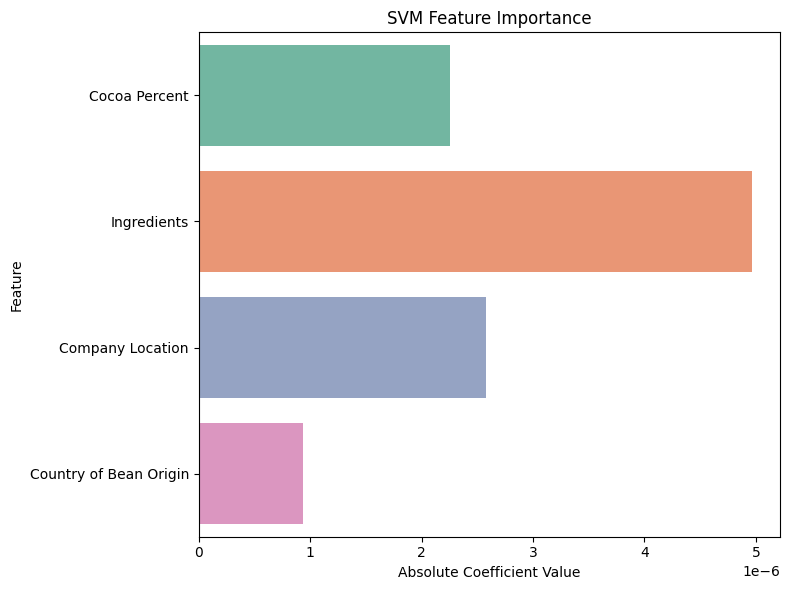

In [28]:
#Visualize feature importances
coef = svm.coef_.ravel()
mean_abs_coef = np.mean(np.abs(svm.coef_), axis=0)
feat_names = df_encoded.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=mean_abs_coef, y=feat_names, palette='Set2')
plt.title('SVM Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# **Naive Bayes Classification**

Confusion Matrix:
[[464   0   9   4]
 [  0   0   5   0]
 [ 54   0   6   0]
 [ 15   0   0   1]]
Accuracy: 0.844
Classification Report:
                       precision    recall  f1-score   support

Bittersweet Chocolate       0.87      0.97      0.92       477
     Chocolate Liquor       0.00      0.00      0.00         5
       Dark Chocolate       0.30      0.10      0.15        60
       Milk Chocolate       0.20      0.06      0.10        16

             accuracy                           0.84       558
            macro avg       0.34      0.28      0.29       558
         weighted avg       0.78      0.84      0.80       558

Top tokens per class:
  Bittersweet Chocolate: cocoa, sweet, nutty, fruit, roasty, sour, earthy, mild, creamy, sandy
  Chocolate Liquor: bitter, fruit, intense, ﬂoral, coffee, strong, fatty, earthy, smooth, pastey
  Dark Chocolate: bitter, mild, intense, fruit, fatty, roasty, nutty, cocoa, sour, tart
  Milk Chocolate: sweet, cocoa, vanilla, banana, gritty, 

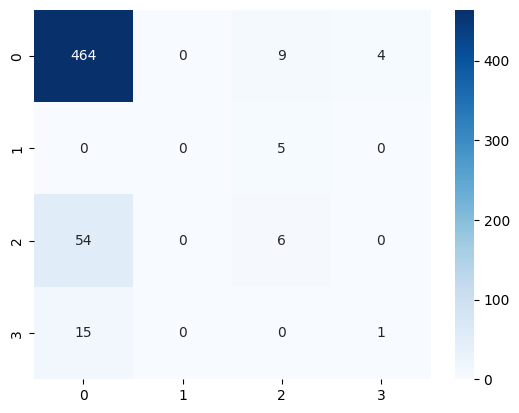

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def chocolate_type(pct):
    if pct <= 60:
        return 'Milk Chocolate'
    elif pct <= 75:
        return 'Bittersweet Chocolate'
    elif pct <= 90:
        return 'Dark Chocolate'
    else:
        return 'Chocolate Liquor'

df_cleaned['Chocolate Type'] = df_cleaned['Cocoa Percent'].apply(chocolate_type)

X_text = df_cleaned['Most Memorable Characteristics']
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X_text)

le = LabelEncoder()
y = le.fit_transform(df_cleaned['Chocolate Type'])

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2,random_state=42)

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_,zero_division=0))

#Show top‐10 words per class
print("Top tokens per class:")
feature_names = vectorizer.get_feature_names_out()
for i, cls in enumerate(le.classes_):
    # feature_log_prob_ is log P(word|class)
    topn = nb.feature_log_prob_[i].argsort()[-10:][::-1]
    top_tokens = feature_names[topn]
    print(f"  {cls}: {', '.join(top_tokens)}")


# **K-Means Clustering**

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error

df_cleaned['Ingredient Complexity'] = (df_cleaned['Ingredients'].apply(lambda s: len([tok for tok in s.split(',') if tok.strip()])))
print(df_cleaned.columns)

Index(['Manufacturing Company', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Speciﬁc Bean Origin', 'Cocoa Percent',
       'Ingredients', 'Most Memorable Characteristics', 'Rating',
       'Quality Category', 'Chocolate Type', 'Ingredient Complexity',
       'cluster', 'Predicted Rating'],
      dtype='object')


In [31]:
df_cleaned.head(10)

,Manufacturing Company,Company Location,Review Date,Country of Bean Origin,Speciﬁc Bean Origin,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Quality Category,Chocolate Type,Ingredient Complexity
0,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,Average,Dark Chocolate,3
1,5150,U.S.A.,2019,Dominican\nRepublic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,Average,Dark Chocolate,3
2,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,Average,Dark Chocolate,3
3,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,"3- B,S,C","milk brownie,\nmacadamia,chewy",3.50,Average,Bittersweet Chocolate,3
4,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80.0,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25,Average,Dark Chocolate,3
5,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00,Average,Bittersweet Chocolate,3
6,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,Average,Bittersweet Chocolate,3
7,20/20,Venezuela,2024,Venezuela,"Chuao, Hacienda Luna Clara,\nAragua",70.0,"2- B,S","choco, fruity, chemical off",2.50,Low Quality,Bittersweet Chocolate,2
8,20N | 20S,France,2022,Venezuela,"Chuao, 2020 Harvest",78.0,"2- B,S","sl. dry, fruit, cocoa, ham",3.00,Average,Dark Chocolate,2
9,20N | 20S,France,2022,Venezuela,"Chuao, 2018 Harvest",78.0,"2- B,S","sandy, astringent, soil, grassy",2.75,Low Quality,Dark Chocolate,2


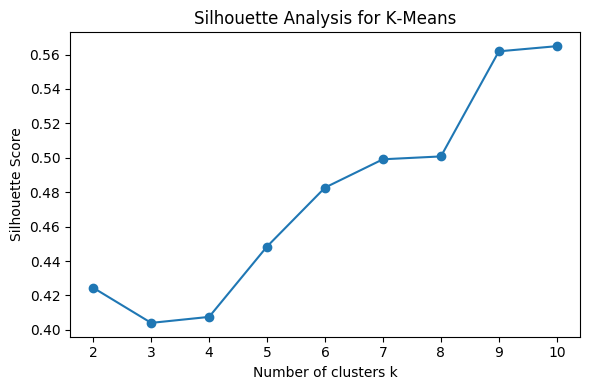

→ Best k by silhouette: 10


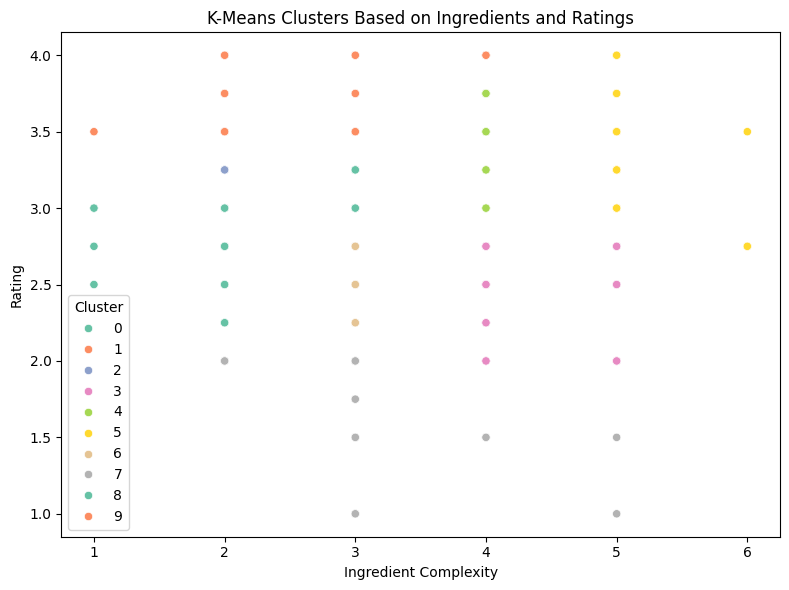


Cluster summary:
         avg_cocoa  avg_complex  avg_rating  count
cluster                                           
0        71.666342     3.000000    3.126459    514
1        71.409091     3.031540    3.647495    539
2        72.064327     2.000000    3.250000    171
3        70.745902     4.289617    2.553279    183
4        70.355422     4.000000    3.304970    332
5        68.892857     5.028571    3.332143    140
6        72.360619     3.000000    2.662611    226
7        85.800000     3.080000    1.610000     25
8        72.630564     1.985163    2.820475    337
9        71.625776     1.996894    3.615683    322

Clustering‑based Root Mean Squared Error: 0.039


In [47]:
features = df_cleaned[['Rating', 'Ingredient Complexity']]
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(features)

scores = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(K_range, scores, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K‑Means')
plt.tight_layout()
plt.show()

best_k = K_range[np.argmax(scores)]
print(f'→ Best k by silhouette: {best_k}')

kmeans = KMeans(n_clusters=best_k, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

#Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Ingredient Complexity', y='Rating', hue='cluster', palette='Set2')
plt.title('K-Means Clusters Based on Ingredients and Ratings')
plt.xlabel('Ingredient Complexity')
plt.ylabel('Rating')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

#Cluster Summary
cluster_summary = (df_cleaned.groupby('cluster').agg(
         avg_cocoa    = ('Cocoa Percent', 'mean'),
         avg_complex  = ('Ingredient Complexity', 'mean'),
         avg_rating   = ('Rating', 'mean'),
         count        = ('Rating', 'size')))

print("\nCluster summary:")
print(cluster_summary)

cluster_means = df_cleaned.groupby('cluster')['Rating'].mean().to_dict()
df_cleaned['Predicted Rating'] = df_cleaned['cluster'].map(cluster_means)

rmse = mean_squared_error(df_cleaned['Rating'], df_cleaned['Predicted Rating'])
print(f"\nClustering‑based Root Mean Squared Error: {rmse:.3f}")


# **Linear Regression**

RMSE: 0.492
R²:   -0.207


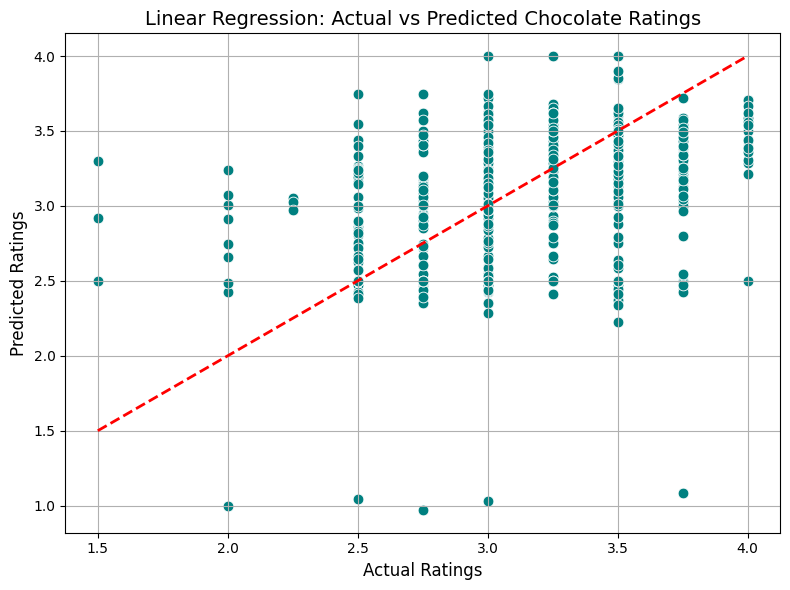

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score

X_Manufacturer = pd.get_dummies(df_cleaned['Manufacturing Company'], prefix='Manufacturer', drop_first=True)

X = pd.concat([df_cleaned[['Cocoa Percent']],X_Manufacturer], axis=1)
y = df_cleaned['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.3f}')
print(f'R²:   {r2:.3f}')

#Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)

# Plot labels and title
plt.xlabel('Actual Ratings', fontsize=12)
plt.ylabel('Predicted Ratings', fontsize=12)
plt.title('Linear Regression: Actual vs Predicted Chocolate Ratings', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()